# Exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [11]:
data = pd.read_csv('coin data/analyses/data-agg.csv')

data['tails_tails'] = data['N_start_tails_up'] - data['tails_heads']
data['heads_tails'] = data['N_start_heads_up'] - data['heads_heads']
data.head()

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin,tails_tails,heads_tails
0,244,240,485,515,frantisekB,20DEM-silver,275,241
1,260,245,505,495,frantisekB,1CZK,250,245
2,209,260,469,531,frantisekB,5CZK,271,260
3,530,495,1021,979,frantisekB,0.25USD,484,491
4,533,507,1039,961,frantisekB,10CZK,454,506


In [19]:
data_prop = pd.DataFrame()

# Calculate the proportion of tosses starting in heads that land on heads
data_prop['proportion_heads_heads'] = data['heads_heads'] / data['N_start_heads_up']

# Calculate the proportion of tosses starting in tails that land on tails
data_prop['proportion_tails_tails'] = data['tails_tails'] / data['N_start_tails_up']

# Calculate the overall proportion of tosses that land on heads and tails
data_prop['proportion_heads_overall'] = (data['heads_heads'] + data['tails_heads']) / data['total_tosses']
data_prop['proportion_tails_overall'] = (data['tails_tails'] + data['heads_tails']) / data['total_tosses']

# Display the updated dataframe
data_prop.mean()

proportion_heads_heads      0.507911
proportion_tails_tails      0.507662
proportion_heads_overall    0.499985
proportion_tails_overall    0.500015
dtype: float64

C:\Users\julso\AppData\Local\Temp\ipykernel_20636\3851453614.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  person_aggregated = data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_20636\3851453614.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_20636\3851453614.py:23: DeprecationWarning: DataFrameGroup

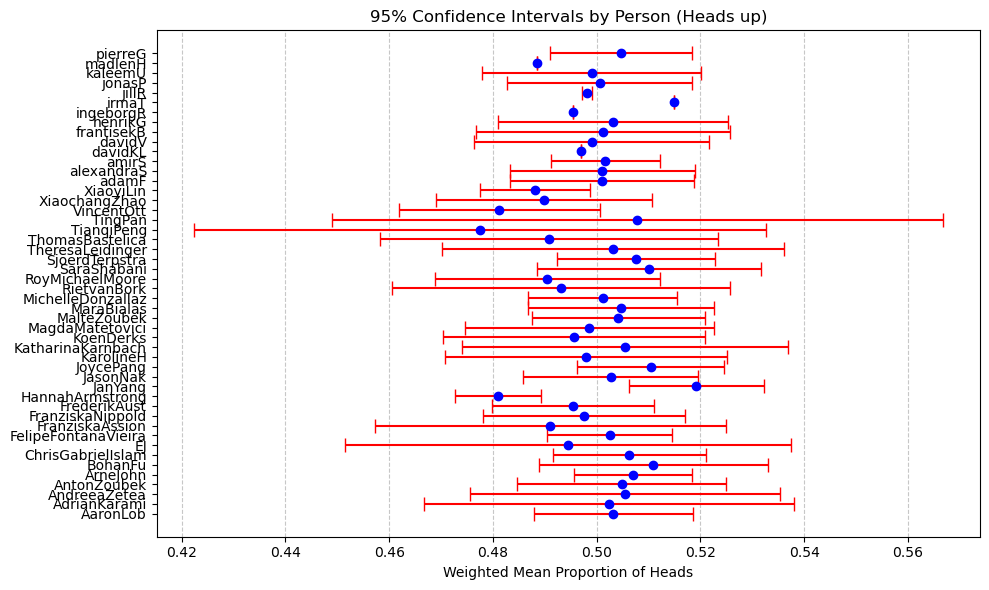

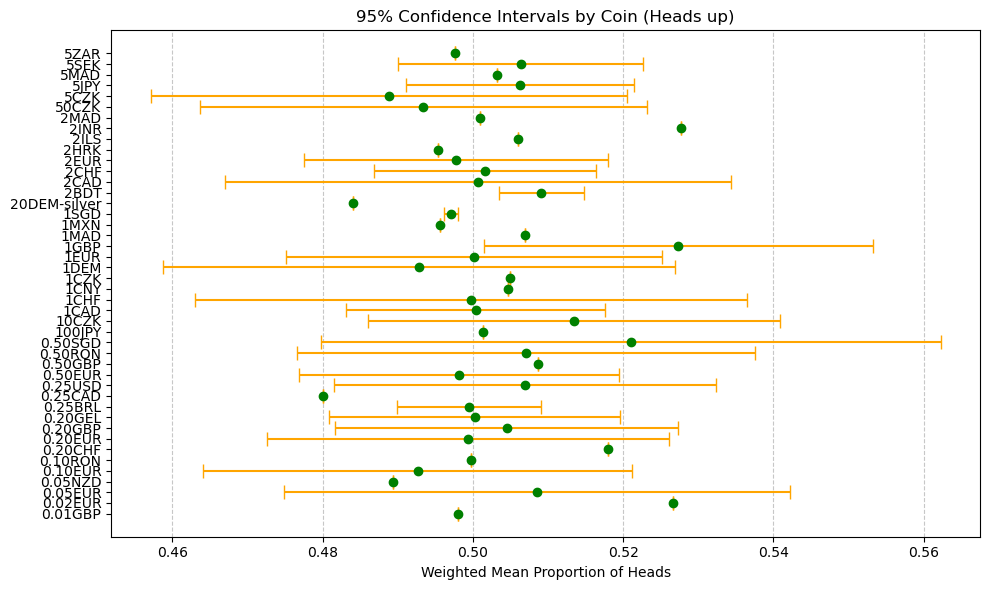

In [4]:
# Correct the proportion calculation to include all heads outcomes
data['total_tosses'] = data['N_start_heads_up'] + data['N_start_tails_up']
data['proportion_heads'] = (data['heads_heads'] + data['tails_heads']) / data['total_tosses']

# Weighted mean and CI calculation for persons (using all tosses)
person_aggregated = data.groupby('person').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_heads'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
person_aggregated['SE'] = np.sqrt(
    (data.groupby('person').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_heads'] - np.average(group['proportion_heads'], weights=group['total_tosses'])) ** 2)
    ) / person_aggregated['total_tosses'])
)
person_aggregated['ME'] = 1.96 * person_aggregated['SE']
person_aggregated['CI_lower'] = person_aggregated['weighted_mean'] - person_aggregated['ME']
person_aggregated['CI_upper'] = person_aggregated['weighted_mean'] + person_aggregated['ME']

# Weighted mean and CI calculation for coins (using all tosses)
coin_aggregated = data.groupby('coin').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_heads'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
coin_aggregated['SE'] = np.sqrt(
    (data.groupby('coin').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_heads'] - np.average(group['proportion_heads'], weights=group['total_tosses'])) ** 2)
    ) / coin_aggregated['total_tosses'])
)
coin_aggregated['ME'] = 1.96 * coin_aggregated['SE']
coin_aggregated['CI_lower'] = coin_aggregated['weighted_mean'] - coin_aggregated['ME']
coin_aggregated['CI_upper'] = coin_aggregated['weighted_mean'] + coin_aggregated['ME']

# Plot for people (corrected proportions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    person_aggregated['weighted_mean'],
    person_aggregated.index,
    xerr=[
        person_aggregated['weighted_mean'] - person_aggregated['CI_lower'],
        person_aggregated['CI_upper'] - person_aggregated['weighted_mean']
    ],
    fmt='o',
    color='blue',
    ecolor='red',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Heads')
ax.set_title('95% Confidence Intervals by Person (Heads up)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coins (corrected proportions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    coin_aggregated['weighted_mean'],
    coin_aggregated.index,
    xerr=[
        coin_aggregated['weighted_mean'] - coin_aggregated['CI_lower'],
        coin_aggregated['CI_upper'] - coin_aggregated['weighted_mean']
    ],
    fmt='o',
    color='green',
    ecolor='orange',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Heads')
ax.set_title('95% Confidence Intervals by Coin (Heads up)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\julso\AppData\Local\Temp\ipykernel_22668\989910078.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  person_aggregated_same = data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_22668\989910078.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_22668\989910078.py:23: DeprecationWarning: DataFrameGro

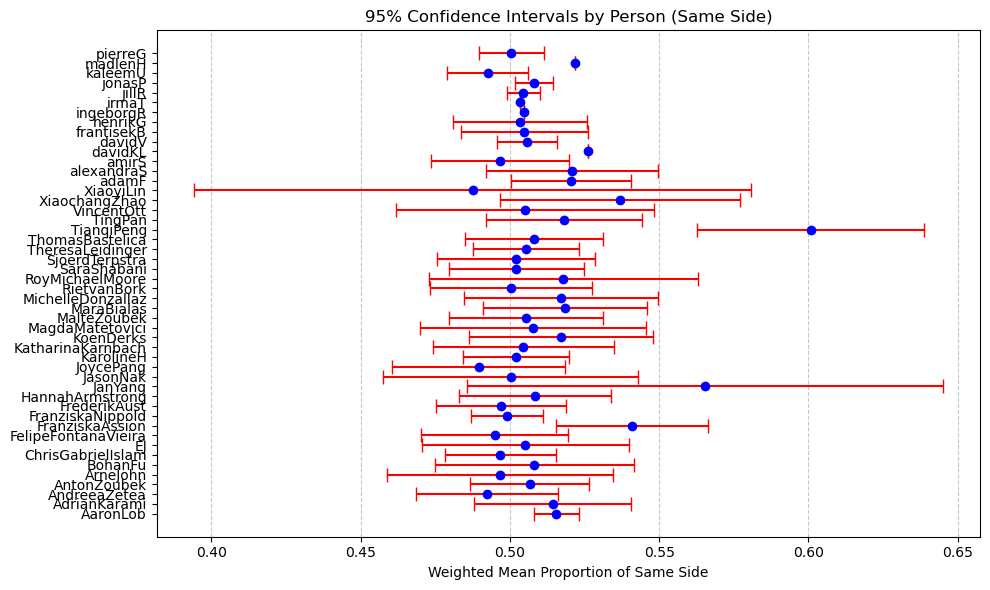

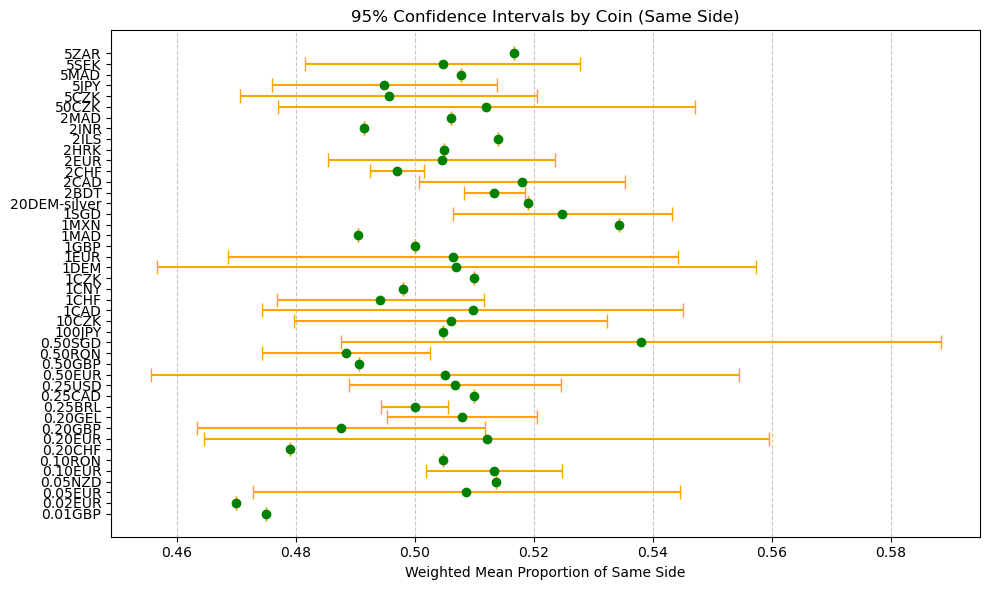

In [21]:
# Correct the proportion calculation to include tosses landing on the same side
data['total_tosses'] = data['N_start_heads_up'] + data['N_start_tails_up']
data['proportion_same_side'] = (data['heads_heads'] + data['tails_tails']) / data['total_tosses']

# Weighted mean and CI calculation for persons (same side)
person_aggregated_same = data.groupby('person').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_same_side'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
person_aggregated_same['SE'] = np.sqrt(
    (data.groupby('person').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_same_side'] - np.average(group['proportion_same_side'], weights=group['total_tosses'])) ** 2)
    ) / person_aggregated_same['total_tosses'])
)
person_aggregated_same['ME'] = 1.96 * person_aggregated_same['SE']
person_aggregated_same['CI_lower'] = person_aggregated_same['weighted_mean'] - person_aggregated_same['ME']
person_aggregated_same['CI_upper'] = person_aggregated_same['weighted_mean'] + person_aggregated_same['ME']

# Weighted mean and CI calculation for coins (same side)
coin_aggregated_same = data.groupby('coin').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_same_side'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
coin_aggregated_same['SE'] = np.sqrt(
    (data.groupby('coin').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_same_side'] - np.average(group['proportion_same_side'], weights=group['total_tosses'])) ** 2)
    ) / coin_aggregated_same['total_tosses'])
)
coin_aggregated_same['ME'] = 1.96 * coin_aggregated_same['SE']
coin_aggregated_same['CI_lower'] = coin_aggregated_same['weighted_mean'] - coin_aggregated_same['ME']
coin_aggregated_same['CI_upper'] = coin_aggregated_same['weighted_mean'] + coin_aggregated_same['ME']

# Plot for people (same side proportion)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    person_aggregated_same['weighted_mean'],
    person_aggregated_same.index,
    xerr=[
        person_aggregated_same['weighted_mean'] - person_aggregated_same['CI_lower'],
        person_aggregated_same['CI_upper'] - person_aggregated_same['weighted_mean']
    ],
    fmt='o',
    color='blue',
    ecolor='red',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Same Side')
ax.set_title('95% Confidence Intervals by Person (Same Side)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coins (same side proportion)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    coin_aggregated_same['weighted_mean'],
    coin_aggregated_same.index,
    xerr=[
        coin_aggregated_same['weighted_mean'] - coin_aggregated_same['CI_lower'],
        coin_aggregated_same['CI_upper'] - coin_aggregated_same['weighted_mean']
    ],
    fmt='o',
    color='green',
    ecolor='orange',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Same Side')
ax.set_title('95% Confidence Intervals by Coin (Same Side)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
data

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin,total_tosses,proportion_heads,proportion_same_side
0,244,240,485,515,frantisekB,20DEM-silver,1000,0.484000,0.519000
1,260,245,505,495,frantisekB,1CZK,1000,0.505000,0.510000
2,209,260,469,531,frantisekB,5CZK,1000,0.469000,0.480000
3,530,495,1021,979,frantisekB,0.25USD,2000,0.512500,0.507000
4,533,507,1039,961,frantisekB,10CZK,2000,0.520000,0.493500
...,...,...,...,...,...,...,...,...,...
206,517,561,1084,1116,FrederikAust,0.50EUR,2200,0.490000,0.487273
207,782,844,1626,1674,FrederikAust,2EUR,3300,0.492727,0.488485
208,233,249,478,522,FrederikAust,1EUR,1000,0.482000,0.506000
209,775,746,1523,1477,FrederikAust,0.20EUR,3000,0.507000,0.502000


In [7]:
data['coin'].unique()

array(['20DEM-silver', '1CZK', '5CZK', '0.25USD', '10CZK', '0.50EUR',
       '1EUR', '2HRK', '1MXN', '2EUR', '5ZAR', '0.05EUR', '0.20EUR',
       '0.20GEL', '1CHF', '1CNY', '100JPY', '5JPY', '2CHF', '5MAD',
       '2MAD', '1MAD', '0.05NZD', '0.10EUR', '0.20GBP', '0.50GBP', '1SGD',
       '1DEM', '1GBP', '1CAD', '0.50RON', '5SEK', '0.02EUR', '50CZK',
       '2CAD', '0.25CAD', '0.01GBP', '0.50SGD', '2BDT', '0.10RON',
       '0.20CHF', '2ILS', '0.25BRL', '2INR'], dtype=object)

In [8]:
coins_data = {
# assume most recent edition
# https://www.saskatooncoinclub.ca/articles/02a_coin_specs.html
        '0.25CAD': {'weight': 4.4, 'diameter': 23.88},
        '1CAD': {'weight': 6.27, 'diameter': 26.50},
        '2CAD': {'weight': 6.92, 'diameter': 28.0},
# https://en.wikipedia.org/wiki/Coins_of_the_Swiss_franc
        '1CHF': {'weight': 4.4, 'diameter': 23.2},
        '2CHF': {'weight': 8.8, 'diameter': 27.4},
        '0.20CHF': {'weight': 4.0, 'diameter': 21.05},
# https://www.cnb.cz/en/banknotes-and-coins/coins/50-czk/
        '1CZK': {'weight': 3.6, 'diameter': 20.0},
        '5CZK': {'weight': 4.8, 'diameter': 23.0},
        '10CZK': {'weight': 7.62, 'diameter': 24.5},
        '50CZK': {'weight': 9.7, 'diameter': 27.5},
# https://en.numista.com/catalogue/pieces43374.html
# https://www.bundesbank.de/en/tasks/cash-management/dem-banknotes-and-dem-coins/-/dem-coins-intended-for-circulation-623716
        '20DEM-silver': {'weight': 18.2, 'diameter': 33.0},
        '1DEM': {'weight': 5.5, 'diameter': 23.5},
# https://www.bcl.lu/en/Banknotes-and-Coins/billets_pieces/car_pieces/car_tec/index.html
        '0.02EUR': {'weight': 3.06, 'diameter': 18.75},
        '0.05EUR': {'weight': 3.92, 'diameter': 21.25},
        '0.10EUR': {'weight': 4.10, 'diameter': 19.75},
        '0.20EUR': {'weight': 5.74, 'diameter': 22.25},
        '0.50EUR': {'weight': 7.80, 'diameter': 24.25},
        '1EUR': {'weight': 7.50, 'diameter': 23.25},
        '2EUR': {'weight': 8.50, 'diameter': 25.75},
# https://www.royalmint.com/discover/uk-coins/coin-design-and-specifications/
        '0.01GBP': {'weight': 6.5, 'diameter': 24.5}, # small and large edition
        '0.20GBP': {'weight': 5.00, 'diameter': 21.40},
        '0.50GBP': {'weight': 8.0, 'diameter': 27.3},
        '1GBP': {'weight': 8.75, 'diameter': 23.43}, # new from 2017
# https://en.numista.com/catalogue/pieces301.html     
        '2HRK': {'weight': 6.20, 'diameter': 24.5},
# https://www.boi.org.il/en/economic-roles/coins/
        '2ILS': {'weight': 5.7, 'diameter': 21.6},
# https://www.rbi.org.in/commonman/English/Currency/scripts/AllCoins.aspx
        '2INR': {'weight': 6.00, 'diameter': 26.00}, # different versions
# https://www.mof.go.jp/english/policy/currency/coin/circulating_coins/list.htm
        '100JPY': {'weight': 4.80, 'diameter': 22.60},
        '5JPY': {'weight': 3.75, 'diameter': 22.00},
# https://www.foreignmoneyexchange.co.uk/shopitems/moroccan-dirham/new-moroccan-dirham-coins#:~:text=The%20current%20Moroccan%201%20Dirham,has%20a%20diameter%20of%2024mm.
        '1MAD': {'weight': 6.00, 'diameter': 24.00},
        '2MAD': {'weight': 7.00, 'diameter': 26.00},
        '5MAD': {'weight': 7.5, 'diameter': 25.00},
# https://en.numista.com/catalogue/pieces585.html
        '1MXN': {'weight': 3.95, 'diameter': 21.00},
# https://www.leftovercurrency.com/exchange/new-zealand-dollars/withdrawn-new-zealand-dollar-coins/5-cent-coin-new-zealand/
        '0.05NZD': {'weight': 5, 'diameter': 24.75},
# https://www.leftovercurrency.com/exchange/romanian-lei/romanian-new-leu-bani-coins/50-bani-coin-romania/
# https://www.leftovercurrency.com/exchange/romanian-lei/romanian-new-leu-bani-coins/10-bani-coin-romania/
        '0.50RON': {'weight': 6.10, 'diameter': 23.75},
        '0.10RON': {'weight': 4, 'diameter': 20.4},
# https://www.riksbank.se/en-gb/payments--cash/notes--coins/coins/valid-coins/5-krona-coin/#:~:text=Facts%205%2Dkrona%20coin,Diameter%3A%2023.75%20millimetres.
        '5SEK': {'weight': 6.10, 'diameter': 23.75},
# https://www.mas.gov.sg/currency/circulation-currency/circulation-currency-coins
        '0.50SGD': {'weight': 6.56, 'diameter': 23.00},
        '1SGD': {'weight': 7.62, 'diameter': 24.65},
# https://www.usmint.gov/learn/coins-and-medals/circulating-coins/coin-specifications
        '0.25USD': {'weight': 5.67, 'diameter': 24.26},
# https://en.numista.com/catalogue/pieces2483.html
        '5ZAR': {'weight': 9.50, 'diameter': 26.00},
# https://nbg.gov.ge/en/georgian-money/coins?id=5
        '0.20GEL': {'weight': 5, 'diameter': 25},
# https://www.bcb.gov.br/dinheirobrasileiro/en/segunda-familia-moedas.html
        '0.25BRL': {'weight': 7.55, 'diameter': 25},
# https://en.ucoin.net/coin/bangladesh-25-poisha-1979/?cid=28230
        '2BDT': {'weight': 2.64, 'diameter': 19},
# https://en.numista.com/catalogue/pieces178139.html
        '1CNY': {'weight': 4.75, 'diameter': 22.25} # new from 2019
}


In [9]:
len(coins_data)

44

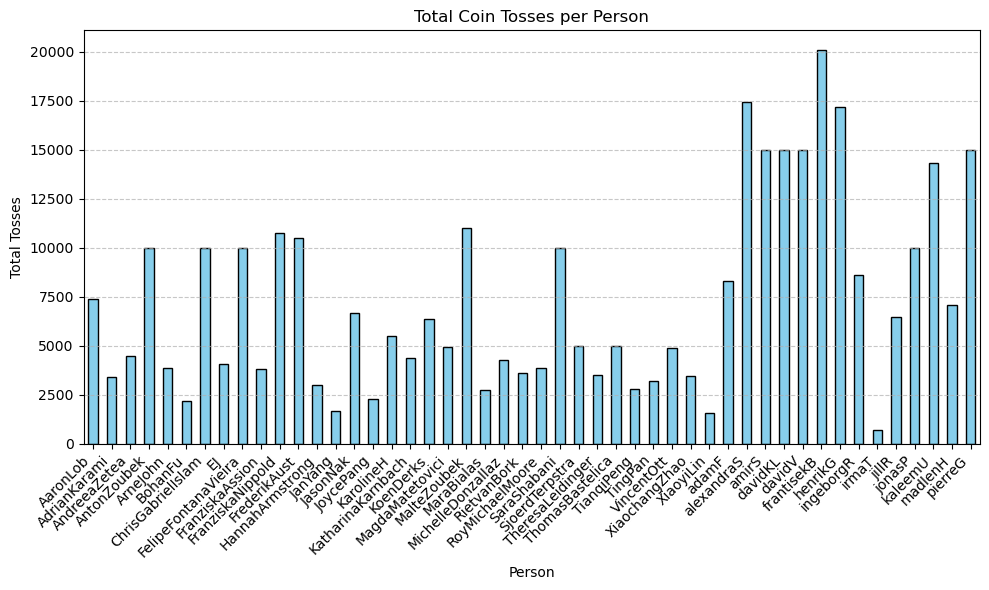

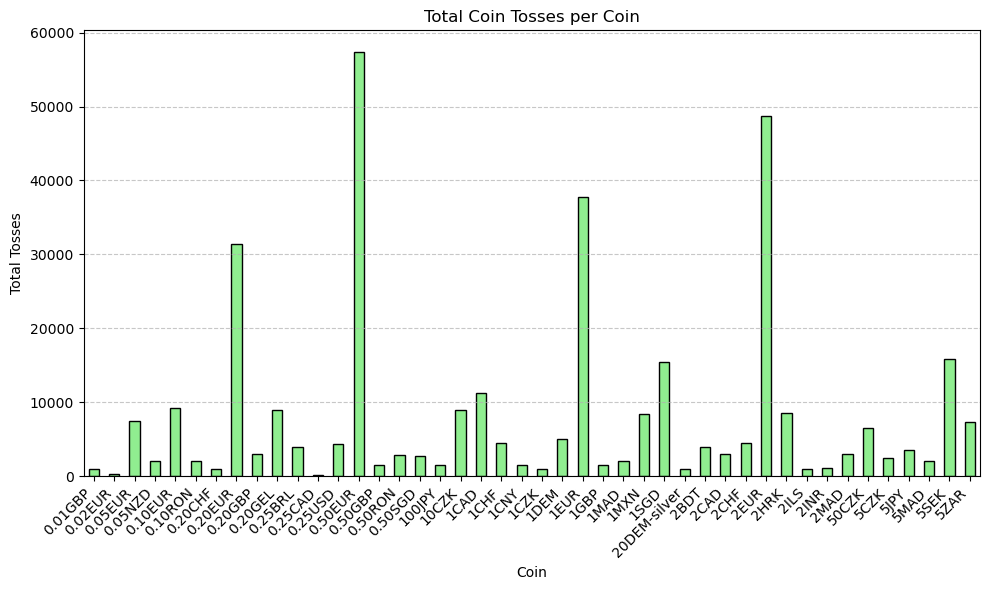

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace 'data.csv' with your actual file name)
# data = pd.read_csv('data.csv')

# Create histograms for the number of tosses per person and per coin
# Group by person and coin to sum total tosses
tosses_per_person = data.groupby('person')['total_tosses'].sum()
tosses_per_coin = data.groupby('coin')['total_tosses'].sum()

# Plot histogram for total tosses per person
plt.figure(figsize=(10, 6))
tosses_per_person.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Coin Tosses per Person')
plt.xlabel('Person')
plt.ylabel('Total Tosses')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot histogram for total tosses per coin
plt.figure(figsize=(10, 6))
tosses_per_coin.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Coin Tosses per Coin')
plt.xlabel('Coin')
plt.ylabel('Total Tosses')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


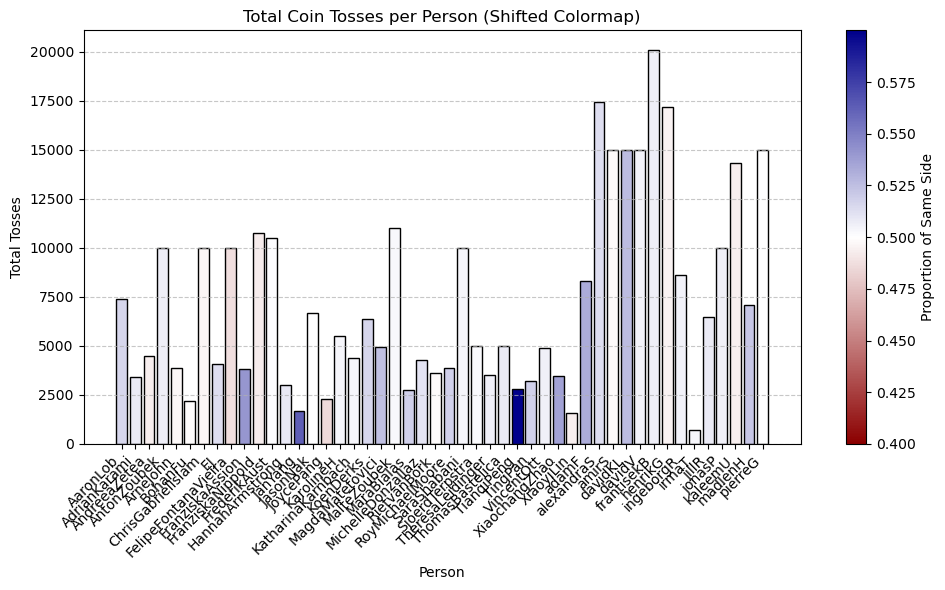

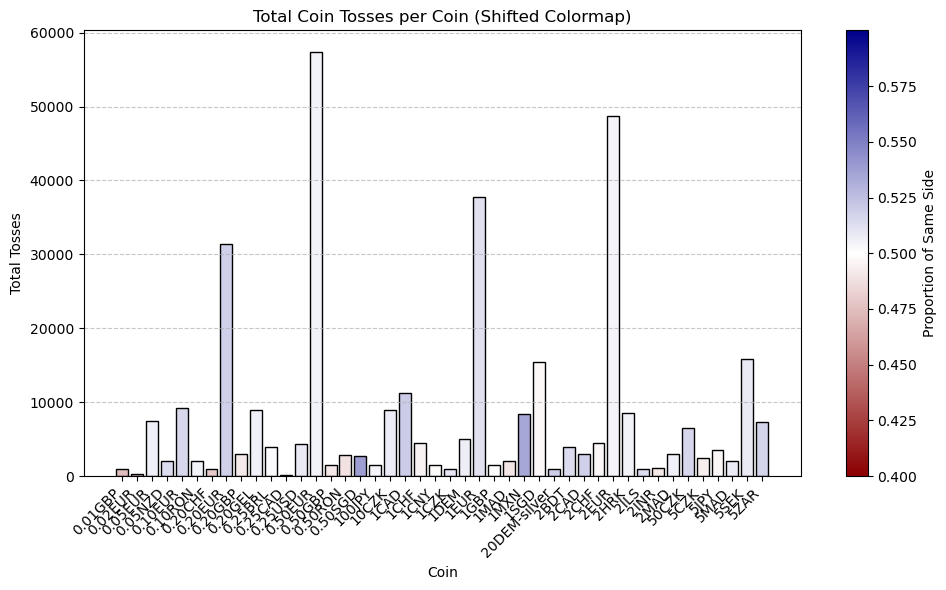

In [11]:
# Those above/below the threshold have been given the strongest color on the map even if they are a lot stronger

# Create histograms for the number of tosses per person and per coin
# Group by person and coin to calculate total tosses and mean proportion_same_side
tosses_per_person = data.groupby('person').agg(
    total_tosses=('total_tosses', 'sum'),
    mean_proportion_same_side=('proportion_same_side', 'mean')
)
tosses_per_coin = data.groupby('coin').agg(
    total_tosses=('total_tosses', 'sum'),
    mean_proportion_same_side=('proportion_same_side', 'mean')
)

# Create a custom diverging colormap with white at 0.5
colors = [(0, "darkred"), (0.5, "white"), (1, "darkblue")]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", colors)

# Normalize the proportions around 0.5
diverging_norm = mcolors.TwoSlopeNorm(vmin=0.4, vcenter=0.5, vmax=0.6)  # Adjust vmin and vmax if needed

# Plot histogram for total tosses per person
fig, ax = plt.subplots(figsize=(10, 6))
colors_person = custom_cmap(diverging_norm(tosses_per_person['mean_proportion_same_side']))
bars = ax.bar(tosses_per_person.index, tosses_per_person['total_tosses'], color=colors_person, edgecolor='black')
ax.set_title('Total Coin Tosses per Person (Shifted Colormap)')
ax.set_xlabel('Person')
ax.set_ylabel('Total Tosses')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=diverging_norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Proportion of Same Side')
plt.tight_layout()
plt.show()

# Plot histogram for total tosses per coin
fig, ax = plt.subplots(figsize=(10, 6))
colors_coin = custom_cmap(diverging_norm(tosses_per_coin['mean_proportion_same_side']))
bars = ax.bar(tosses_per_coin.index, tosses_per_coin['total_tosses'], color=colors_coin, edgecolor='black')
ax.set_title('Total Coin Tosses per Coin (Shifted Colormap)')
ax.set_xlabel('Coin')
ax.set_ylabel('Total Tosses')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=diverging_norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Proportion of Same Side')
plt.tight_layout()
plt.show()


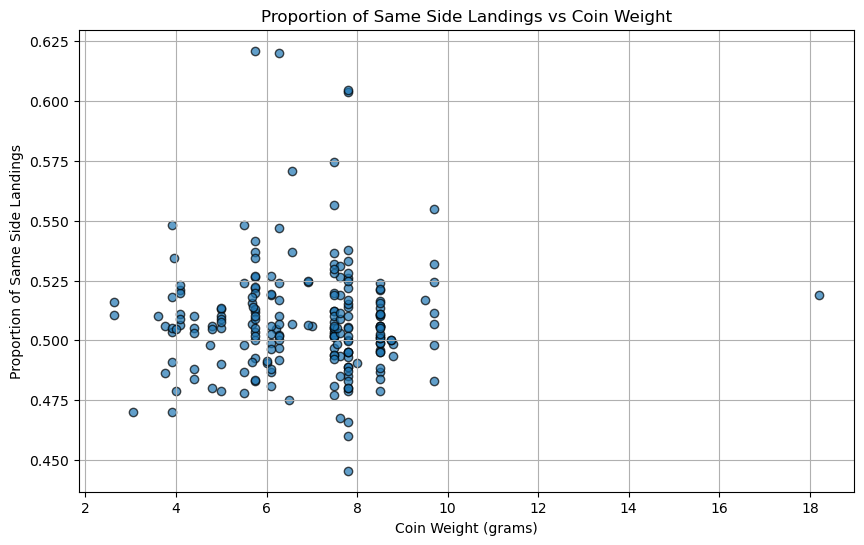

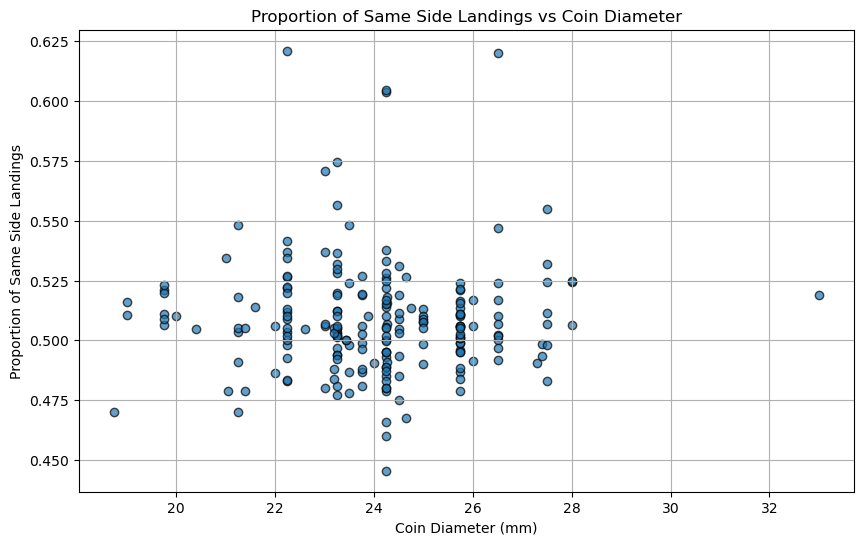

In [12]:
coin_specs = pd.DataFrame.from_dict(coins_data, orient='index')
coin_specs.reset_index(inplace=True)
coin_specs.rename(columns={'index': 'coin'}, inplace=True)

# Merge dataframes
df = pd.merge(data, coin_specs, on='coin', how='left')

# Plot proportion_same_side vs weight
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['proportion_same_side'], alpha=0.7, edgecolor='k')
plt.title('Proportion of Same Side Landings vs Coin Weight')
plt.xlabel('Coin Weight (grams)')
plt.ylabel('Proportion of Same Side Landings')
plt.grid(True)
plt.show()

# Plot proportion_same_side vs diameter
plt.figure(figsize=(10, 6))
plt.scatter(df['diameter'], df['proportion_same_side'], alpha=0.7, edgecolor='k')
plt.title('Proportion of Same Side Landings vs Coin Diameter')
plt.xlabel('Coin Diameter (mm)')
plt.ylabel('Proportion of Same Side Landings')
plt.grid(True)
plt.show()


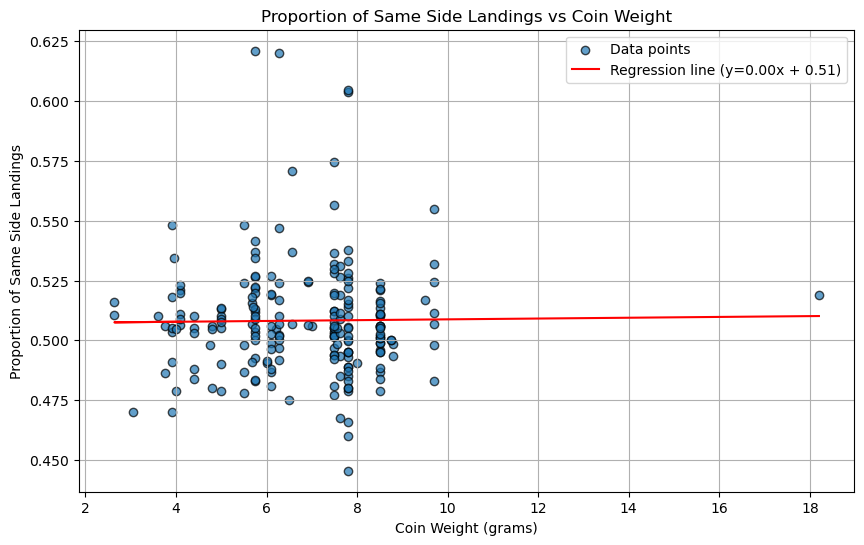

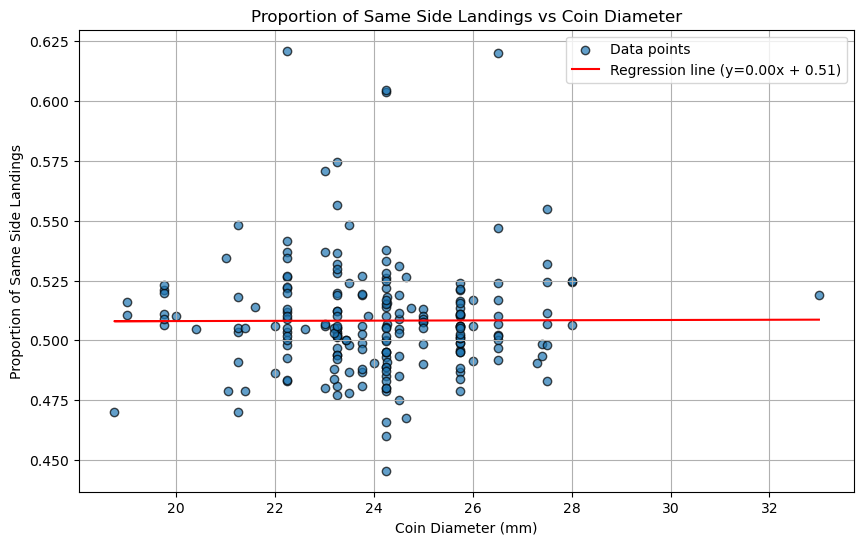

In [13]:
coin_specs = pd.DataFrame.from_dict(coins_data, orient='index')
coin_specs.reset_index(inplace=True)
coin_specs.rename(columns={'index': 'coin'}, inplace=True)

# Merge dataframes
df = pd.merge(data, coin_specs, on='coin', how='left')

# Function to plot scatter and regression line
def scatter_with_regression(x, y, xlabel, ylabel, title):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, edgecolor='k', label='Data points')
    
    # Fit regression line
    coeffs = np.polyfit(x, y, 1)
    reg_line = np.poly1d(coeffs)
    plt.plot(x, reg_line(x), color='red', label=f'Regression line (y={coeffs[0]:.2f}x + {coeffs[1]:.2f})')
    
    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot proportion_same_side vs weight
scatter_with_regression(df['weight'], df['proportion_same_side'], 
                        xlabel='Coin Weight (grams)', 
                        ylabel='Proportion of Same Side Landings', 
                        title='Proportion of Same Side Landings vs Coin Weight')

# Plot proportion_same_side vs diameter
scatter_with_regression(df['diameter'], df['proportion_same_side'], 
                        xlabel='Coin Diameter (mm)', 
                        ylabel='Proportion of Same Side Landings', 
                        title='Proportion of Same Side Landings vs Coin Diameter')


In [14]:
df

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin,total_tosses,proportion_heads,proportion_same_side,weight,diameter
0,244,240,485,515,frantisekB,20DEM-silver,1000,0.484000,0.519000,18.20,33.00
1,260,245,505,495,frantisekB,1CZK,1000,0.505000,0.510000,3.60,20.00
2,209,260,469,531,frantisekB,5CZK,1000,0.469000,0.480000,4.80,23.00
3,530,495,1021,979,frantisekB,0.25USD,2000,0.512500,0.507000,5.67,24.26
4,533,507,1039,961,frantisekB,10CZK,2000,0.520000,0.493500,7.62,24.50
...,...,...,...,...,...,...,...,...,...,...,...
206,517,561,1084,1116,FrederikAust,0.50EUR,2200,0.490000,0.487273,7.80,24.25
207,782,844,1626,1674,FrederikAust,2EUR,3300,0.492727,0.488485,8.50,25.75
208,233,249,478,522,FrederikAust,1EUR,1000,0.482000,0.506000,7.50,23.25
209,775,746,1523,1477,FrederikAust,0.20EUR,3000,0.507000,0.502000,5.74,22.25


In [15]:
df[df['weight'].isna()]

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin,total_tosses,proportion_heads,proportion_same_side,weight,diameter


In [16]:
df[df['coin'] == '5SEK']

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin,total_tosses,proportion_heads,proportion_same_side,weight,diameter
65,244,217,460,440,ArneJohn,5SEK,900,0.512222,0.518889,6.1,23.75
100,241,247,488,512,MagdaMatetovici,5SEK,1000,0.488000,0.506000,6.1,23.75
115,277,236,514,486,SjoerdTerpstra,5SEK,1000,0.513000,0.527000,6.1,23.75
184,1318,1258,2578,2423,AntonZoubek,5SEK,5001,0.515097,0.496501,6.1,23.75
189,482,511,995,1006,ChrisGabrielIslam,5SEK,2001,0.496252,0.488256,6.1,23.75
194,758,743,1507,1493,MalteZoubek,5SEK,3000,0.500333,0.502667,6.1,23.75
198,802,718,1526,1474,SaraShabani,5SEK,3000,0.506667,0.519333,6.1,23.75


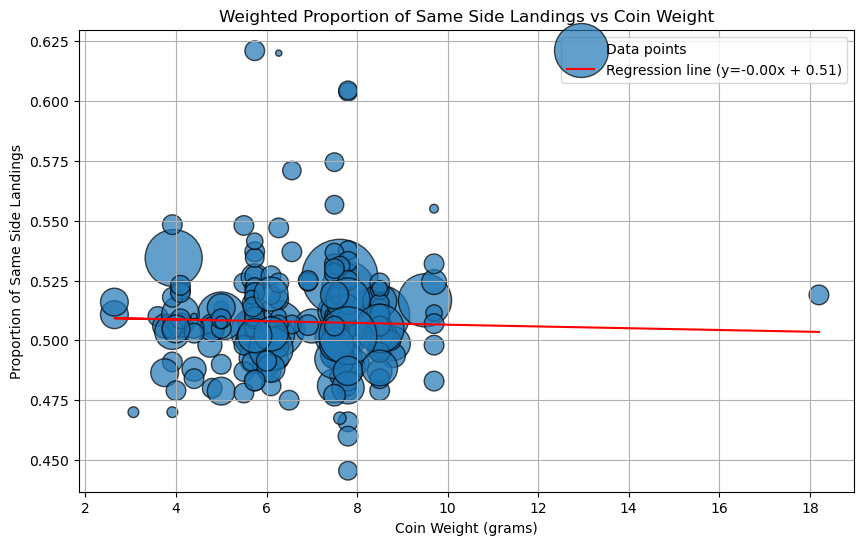

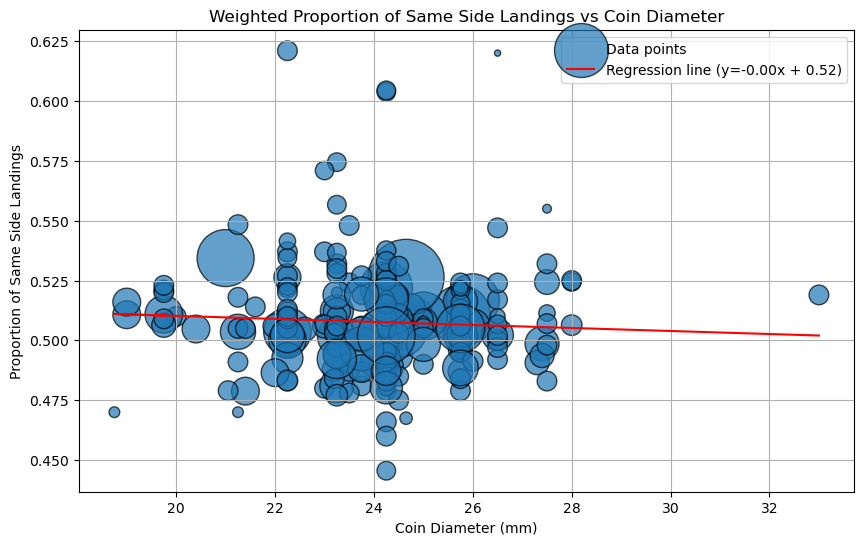

In [17]:
import statsmodels.api as sm

def scatter_with_weighted_regression(x, y, weights, xlabel, ylabel, title):
    # Filter out invalid values
    valid_indices = np.isfinite(x) & np.isfinite(y) & np.isfinite(weights)
    x = x[valid_indices]
    y = y[valid_indices]
    weights = weights[valid_indices]

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, edgecolor='k', label='Data points', s=weights / np.min(weights) * 20)

    if len(x) > 1:  # Ensure there are enough points for regression
        # Fit weighted regression
        x_with_const = sm.add_constant(x)  # Add constant for intercept
        model = sm.WLS(y, x_with_const, weights=weights)
        results = model.fit()

        # Regression line
        plt.plot(x, results.predict(x_with_const), color='red', 
                 label=f'Regression line (y={results.params[1]:.2f}x + {results.params[0]:.2f})')
    else:
        print("Not enough valid data points for regression.")

    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plotting function with weights (total_tosses)
scatter_with_weighted_regression(df['weight'].values, df['proportion_same_side'].values, 
                                 df['total_tosses'].values, 
                                 xlabel='Coin Weight (grams)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Weight')

scatter_with_weighted_regression(df['diameter'].values, df['proportion_same_side'].values, 
                                 df['total_tosses'].values, 
                                 xlabel='Coin Diameter (mm)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Diameter')


Regression Results for Weighted Proportion of Same Side Landings vs Coin Weight
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2342
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.629
Time:                        12:28:40   Log-Likelihood:                 512.39
No. Observations:                 211   AIC:                            -1021.
Df Residuals:                     209   BIC:                            -1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

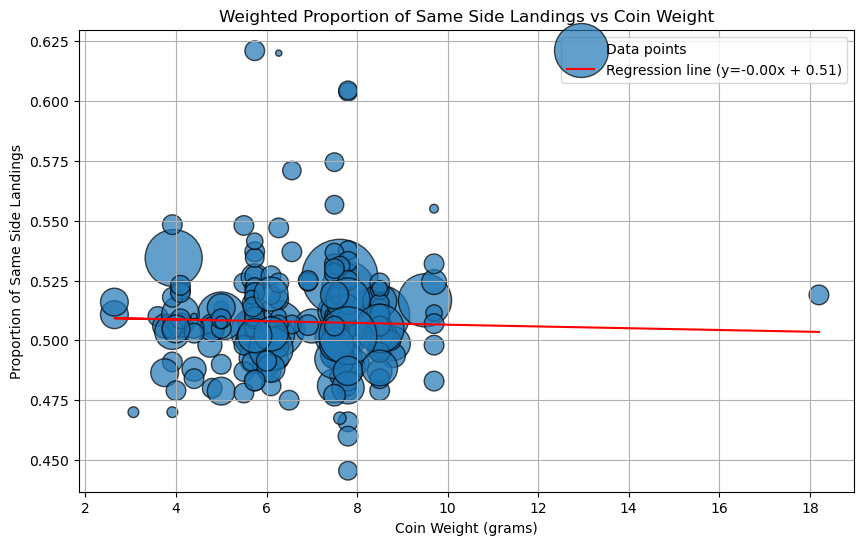

Regression Results for Weighted Proportion of Same Side Landings vs Coin Diameter
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8380
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.361
Time:                        12:28:40   Log-Likelihood:                 512.69
No. Observations:                 211   AIC:                            -1021.
Df Residuals:                     209   BIC:                            -1015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

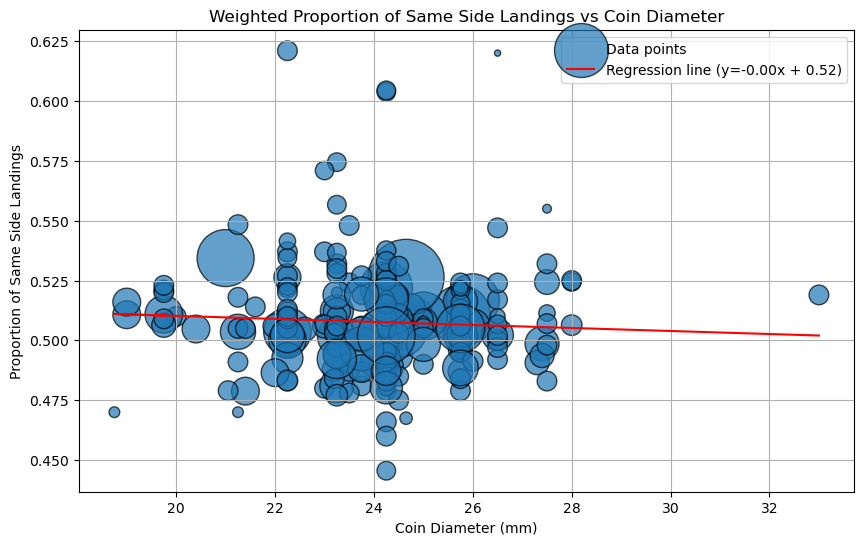

In [18]:
import statsmodels.api as sm

def scatter_with_weighted_regression(x, y, weights, xlabel, ylabel, title):
    # Filter out invalid values
    valid_indices = np.isfinite(x) & np.isfinite(y) & np.isfinite(weights)
    x = x[valid_indices]
    y = y[valid_indices]
    weights = weights[valid_indices]

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, edgecolor='k', label='Data points', s=weights / np.min(weights) * 20)

    if len(x) > 1:  # Ensure there are enough points for regression
        # Fit weighted regression
        x_with_const = sm.add_constant(x)  # Add constant for intercept
        model = sm.WLS(y, x_with_const, weights=weights)
        results = model.fit()

        # Print regression summary
        print(f"Regression Results for {title}")
        print(results.summary())

        # Regression line
        plt.plot(x, results.predict(x_with_const), color='red', 
                 label=f'Regression line (y={results.params[1]:.2f}x + {results.params[0]:.2f})')
    else:
        print("Not enough valid data points for regression.")

    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plotting function with weights (total_tosses)
scatter_with_weighted_regression(df['weight'].values, df['proportion_same_side'].values, 
                                 df['total_tosses'].values, 
                                 xlabel='Coin Weight (grams)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Weight')

scatter_with_weighted_regression(df['diameter'].values, df['proportion_same_side'].values, 
                                 df['total_tosses'].values, 
                                 xlabel='Coin Diameter (mm)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Diameter')


In [19]:
def multiple_regression_with_interaction(df, xlabel, ylabel, title):
    # Prepare the data
    df = df.dropna(subset=['weight', 'diameter', 'proportion_same_side', 'total_tosses'])
    df['interaction'] = df['weight'] * df['diameter']
    
    # Define predictors and response
    X = df[['weight', 'diameter', 'interaction']]
    X = sm.add_constant(X)  # Add constant for intercept
    y = df['proportion_same_side']
    weights = df['total_tosses']
    
    # Fit weighted regression
    model = sm.WLS(y, X, weights=weights)
    results = model.fit()
    
    # Print regression summary
    print(f"Regression Results for {title}")
    print(results.summary())

# Perform the analysis
multiple_regression_with_interaction(
    df,
    xlabel='Predicted Proportion of Same Side Landings',
    ylabel='Actual Proportion of Same Side Landings',
    title='Weighted Multiple Regression: Weight, Diameter, and Interaction'
)


Regression Results for Weighted Multiple Regression: Weight, Diameter, and Interaction
                             WLS Regression Results                             
Dep. Variable:     proportion_same_side   R-squared:                       0.009
Model:                              WLS   Adj. R-squared:                 -0.005
Method:                   Least Squares   F-statistic:                    0.6356
Date:                  Tue, 17 Dec 2024   Prob (F-statistic):              0.593
Time:                          12:28:40   Log-Likelihood:                 513.24
No. Observations:                   211   AIC:                            -1018.
Df Residuals:                       207   BIC:                            -1005.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [20]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert coins_data to a DataFrame for merging
coins_data_df = pd.DataFrame.from_dict(coins_data, orient='index').reset_index()
coins_data_df.columns = ['coin', 'weight', 'diameter']

# Merge the data DataFrame with the coins_data DataFrame
merged_data = pd.merge(data, coins_data_df, on='coin', how='left')

# Prepare the data for regression
# Assuming `proportion_heads` is the dependent variable
# Add dummy variables for 'person' (categorical variable)
merged_data = pd.get_dummies(merged_data, columns=['person'], drop_first=True)

# Create the regression formula
continuous_vars = ['weight', 'diameter']
categorical_vars = [col for col in merged_data.columns if col.startswith('person_')]
formula = 'proportion_heads ~ ' + ' + '.join(continuous_vars + categorical_vars)

# Fit the regression model
model = smf.ols(formula=formula, data=merged_data).fit()

# Print the regression summary
print(model.summary())

# Extract and display a simplified summary table
summary_table = model.summary2().tables[1]
print("\nRegression Analysis Summary Table:")
print(summary_table.to_string(index=True))


                            OLS Regression Results                            
Dep. Variable:       proportion_heads   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.295
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.118
Time:                        12:28:41   Log-Likelihood:                 613.06
No. Observations:                 211   AIC:                            -1126.
Df Residuals:                     161   BIC:                            -958.5
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [21]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert coins_data to a DataFrame for merging
coins_data_df = pd.DataFrame.from_dict(coins_data, orient='index').reset_index()
coins_data_df.columns = ['coin', 'weight', 'diameter']

# Merge the data DataFrame with the coins_data DataFrame
merged_data = 0
merged_data = pd.merge(data, coins_data_df, on='coin', how='left')

# Create the regression formula with `person` as a categorical variable
formula = 'proportion_heads ~ weight + diameter + C(person)'

# Fit the regression model
model = smf.ols(formula=formula, data=merged_data).fit()

# Print the regression summary
print(model.summary())

# Extract the ANOVA table to check the significance of `person`
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA table
print("\nANOVA Table:")
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:       proportion_heads   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.295
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.118
Time:                        12:28:41   Log-Likelihood:                 613.06
No. Observations:                 211   AIC:                            -1126.
Df Residuals:                     161   BIC:                            -958.5
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [22]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert coins_data to a DataFrame for merging
coins_data_df = pd.DataFrame.from_dict(coins_data, orient='index').reset_index()
coins_data_df.columns = ['coin', 'weight', 'diameter']

# Merge the data DataFrame with the coins_data DataFrame
merged_data = pd.merge(data, coins_data_df, on='coin', how='left')

# Create the regression formula with `person` as a categorical variable
formula = 'proportion_heads ~ weight + diameter + C(person)'

# Fit the regression model
model = smf.ols(formula=formula, data=merged_data).fit()

# Generate the ANOVA table to assess the effect of `person`
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
print("\nANOVA Table:")
print(anova_table)

# Display the summary excluding individual person effects
print("\nRegression Summary (Without Individual Effects):")
summary = model.summary2().tables[1]
summary_reduced = summary.loc[['weight', 'diameter']]
print(summary_reduced.to_string(index=True))



ANOVA Table:
             sum_sq     df         F    PR(>F)
C(person)  0.013245   47.0  1.226456  0.176978
weight     0.000099    1.0  0.432110  0.511894
diameter   0.000106    1.0  0.463047  0.497181
Residual   0.036993  161.0       NaN       NaN

Regression Summary (Without Individual Effects):
             Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
weight   -0.000675  0.001028 -0.657351  0.511894 -0.002705  0.001354
diameter -0.000651  0.000957 -0.680475  0.497181 -0.002541  0.001239


Regression Results for Weighted Proportion of Same Side Landings vs Coin Weight
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            WLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4886
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.485
Time:                        12:28:41   Log-Likelihood:                 509.82
No. Observations:                 210   AIC:                            -1016.
Df Residuals:                     208   BIC:                            -1009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

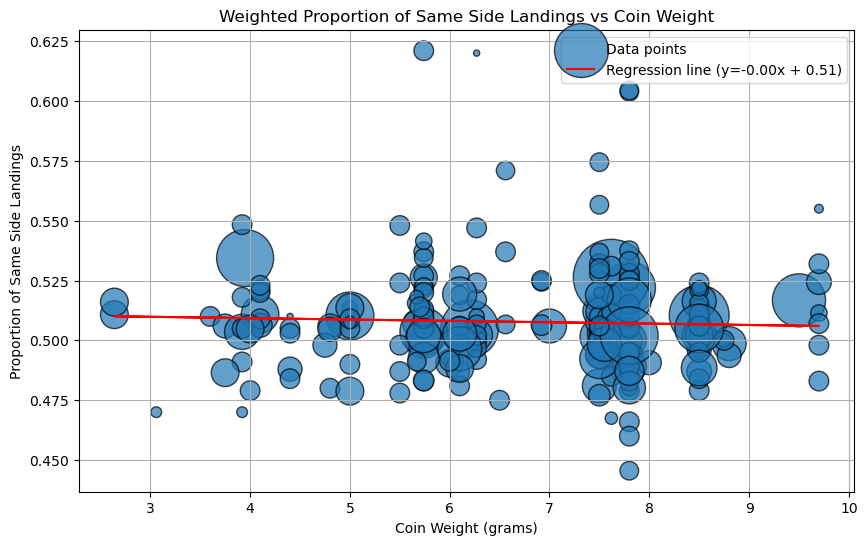

Regression Results for Weighted Proportion of Same Side Landings vs Coin Diameter
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.151
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.284
Time:                        12:28:41   Log-Likelihood:                 510.15
No. Observations:                 210   AIC:                            -1016.
Df Residuals:                     208   BIC:                            -1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

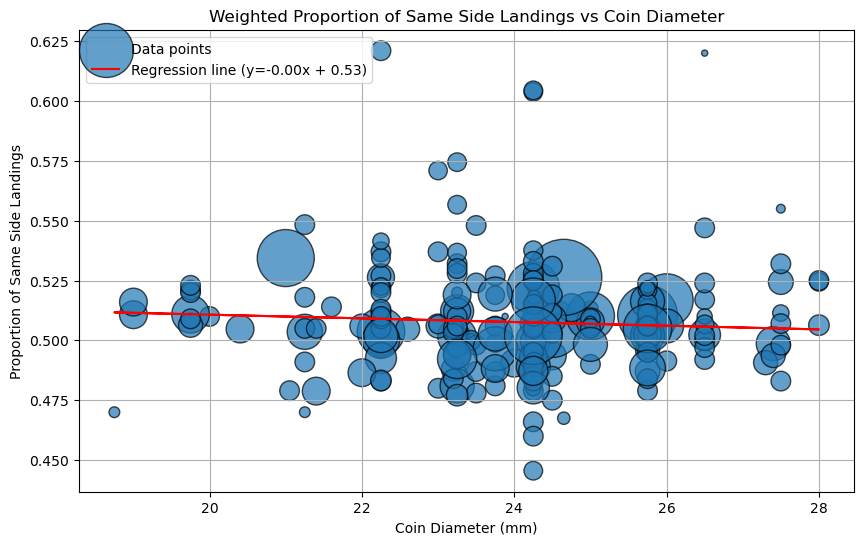

In [23]:
# Exclude the "20DEM-silver" coin
df_filtered = df[df['coin'] != '20DEM-silver']

# Call the plotting function with filtered data
scatter_with_weighted_regression(df_filtered['weight'].values, 
                                 df_filtered['proportion_same_side'].values, 
                                 df_filtered['total_tosses'].values, 
                                 xlabel='Coin Weight (grams)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Weight')

scatter_with_weighted_regression(df_filtered['diameter'].values, 
                                 df_filtered['proportion_same_side'].values, 
                                 df_filtered['total_tosses'].values, 
                                 xlabel='Coin Diameter (mm)', 
                                 ylabel='Proportion of Same Side Landings', 
                                 title='Weighted Proportion of Same Side Landings vs Coin Diameter')
